# importing library

In [108]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [109]:
df1 = pd.read_csv("adult.csv") #reading the file

In [110]:
df1.head(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [111]:
df1.columns # column in the data frame 

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [112]:
df1.dtypes # columns data types 

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [113]:
# get all the categorical columns name
#cat_cols = list(df1.select_dtypes(include='object').columns)
#print(f'Categorical columns: {cat_cols}')

In [114]:
# get all the continuous columns name
#num_cols = list(df1.select_dtypes(exclude='object').columns)
#print(f'Continuous columns: {num_cols}')

# filter categorical data and numerical data

In [115]:
# filter categorical data and numerical data
# categorical_columns =df[[cat_col_1,cat_col_2,cat_col_3,cat_col_4]].copy() # diffrent way of writing 

# all categorical data we need to first encode them 

numerics= ['int8' , 'int16' , 'int32' , 'int64' , 'float16' , 'float32' , 'float64'] 

categorical_col=[]   
    
features = df1.columns.values.tolist()   
for col in features:
    if df1[col].dtype in numerics:  
    
        continue
        
    categorical_col.append(col) 

In [116]:
categorical_columns=df1[categorical_col].copy()

In [117]:
categorical_col # List of categorical_columns in the data frame 

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country',
 'salary']

# Encoding the target varible 

In [262]:
categorical_columns['salary']=categorical_columns['salary'].replace('<=50K', 0)
categorical_columns['salary']=categorical_columns['salary'].replace('>50K', 1)

In [263]:
categorical_columns

,workclass,education,marital_status,occupation,relationship,race,sex,country,salary
0,State_gov,Bachelors,Never_married,Adm_clerical,Not_in_family,White,Male,United_States,0
1,Self_emp_not_inc,Bachelors,Married_civ_spouse,Exec_managerial,Husband,White,Male,United_States,0
2,Private,school,Divorced,Handlers_cleaners,Not_in_family,White,Male,United_States,0
3,Private,school,Married_civ_spouse,Handlers_cleaners,Husband,Black,Male,United_States,0
4,Private,Bachelors,Married_civ_spouse,Prof_specialty,Wife,Black,Female,Cuba,0
...,...,...,...,...,...,...,...,...,...
32556,Private,Associate,Married_civ_spouse,Tech_support,Wife,White,Female,United_States,0
32557,Private,school,Married_civ_spouse,Machine_op_inspct,Husband,White,Male,United_States,1
32558,Private,school,Widowed,Adm_clerical,Unmarried,White,Female,United_States,0
32559,Private,school,Never_married,Adm_clerical,Own_child,White,Male,United_States,0


In [120]:
categorical_columns.rename(columns={"marital-status": "marital_status"}, inplace=True)

In [121]:
categorical_columns

,workclass,education,marital_status,occupation,relationship,race,sex,country,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,0
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,0
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,0
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,0
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,0
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,1
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,0
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,0


In [122]:
df5=categorical_columns['workclass']
b= []
for i in  df5:
    b.append('_'.join(i.split('-')).strip())
    

categorical_columns['workclass']=b

In [123]:
df5=categorical_columns['education']
b= []
for i in  df5:
    b.append('_'.join(i.split('-')).strip())
    

categorical_columns['education']=b

In [124]:
df5=categorical_columns['marital_status']
b= []
for i in  df5:
    b.append('_'.join(i.split('-')).strip())
    

categorical_columns['marital_status']=b

In [125]:
df5=categorical_columns['occupation']
b= []
for i in  df5:
    b.append('_'.join(i.split('-')).strip())
    

categorical_columns['occupation']=b

In [126]:
df5=categorical_columns['relationship']
b= []
for i in  df5:
    b.append('_'.join(i.split('-')).strip())
    

categorical_columns['relationship']=b

In [127]:
df5=categorical_columns['country']
b= []
for i in  df5:
    b.append('_'.join(i.split('-')).strip())
    

categorical_columns['country']=b

In [128]:
df5=categorical_columns['sex']
b= []
for i in  df5:
    b.append('_'.join(i.split('-')).strip())
    

categorical_columns['sex']=b

In [129]:
df5=categorical_columns['race']
b= []
for i in  df5:
    b.append('_'.join(i.split('-')).strip())
    

categorical_columns['race']=b

In [130]:
categorical_columns

,workclass,education,marital_status,occupation,relationship,race,sex,country,salary
0,State_gov,Bachelors,Never_married,Adm_clerical,Not_in_family,White,Male,United_States,0
1,Self_emp_not_inc,Bachelors,Married_civ_spouse,Exec_managerial,Husband,White,Male,United_States,0
2,Private,HS_grad,Divorced,Handlers_cleaners,Not_in_family,White,Male,United_States,0
3,Private,11th,Married_civ_spouse,Handlers_cleaners,Husband,Black,Male,United_States,0
4,Private,Bachelors,Married_civ_spouse,Prof_specialty,Wife,Black,Female,Cuba,0
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc_acdm,Married_civ_spouse,Tech_support,Wife,White,Female,United_States,0
32557,Private,HS_grad,Married_civ_spouse,Machine_op_inspct,Husband,White,Male,United_States,1
32558,Private,HS_grad,Widowed,Adm_clerical,Unmarried,White,Female,United_States,0
32559,Private,HS_grad,Never_married,Adm_clerical,Own_child,White,Male,United_States,0


In [131]:
categorical_columns['workclass'].unique()

array(['State_gov', 'Self_emp_not_inc', 'Private', 'Federal_gov',
       'Local_gov', '?', 'Self_emp_inc', 'Without_pay', 'Never_worked'],
      dtype=object)

In [132]:
categorical_columns["sex"].unique()

array(['Male', 'Female'], dtype=object)

In [133]:
categorical_columns["race"].unique()

array(['White', 'Black', 'Asian_Pac_Islander', 'Amer_Indian_Eskimo',
       'Other'], dtype=object)

In [134]:
categorical_columns

,workclass,education,marital_status,occupation,relationship,race,sex,country,salary
0,State_gov,Bachelors,Never_married,Adm_clerical,Not_in_family,White,Male,United_States,0
1,Self_emp_not_inc,Bachelors,Married_civ_spouse,Exec_managerial,Husband,White,Male,United_States,0
2,Private,HS_grad,Divorced,Handlers_cleaners,Not_in_family,White,Male,United_States,0
3,Private,11th,Married_civ_spouse,Handlers_cleaners,Husband,Black,Male,United_States,0
4,Private,Bachelors,Married_civ_spouse,Prof_specialty,Wife,Black,Female,Cuba,0
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc_acdm,Married_civ_spouse,Tech_support,Wife,White,Female,United_States,0
32557,Private,HS_grad,Married_civ_spouse,Machine_op_inspct,Husband,White,Male,United_States,1
32558,Private,HS_grad,Widowed,Adm_clerical,Unmarried,White,Female,United_States,0
32559,Private,HS_grad,Never_married,Adm_clerical,Own_child,White,Male,United_States,0


In [135]:
print(categorical_columns["race"].unique())
print(categorical_columns["sex"].unique())
print(categorical_columns["country"].unique())
print(categorical_columns["relationship"].unique())
print(categorical_columns["occupation"].unique())
print(categorical_columns["marital_status"].unique())
print(categorical_columns["education"].unique())
print(categorical_columns["workclass"].unique())

['White' 'Black' 'Asian_Pac_Islander' 'Amer_Indian_Eskimo' 'Other']
['Male' 'Female']
['United_States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto_Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican_Republic' 'El_Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying_US(Guam_USVI_etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand_Netherlands']
['Not_in_family' 'Husband' 'Wife' 'Own_child' 'Unmarried' 'Other_relative']
['Adm_clerical' 'Exec_managerial' 'Handlers_cleaners' 'Prof_specialty'
 'Other_service' 'Sales' 'Craft_repair' 'Transport_moving'
 'Farming_fishing' 'Machine_op_inspct' 'Tech_support' '?'
 'Protective_serv' 'Armed_Forces' 'Priv_house_serv']
['Never_married' 'Married_civ_spouse' 'Divorced' 'Married_spouse_absent'
 'Separated' 'Married_AF_spouse' 'Widowed']
['Bachelors

# Observation  for the catcategorical_columns

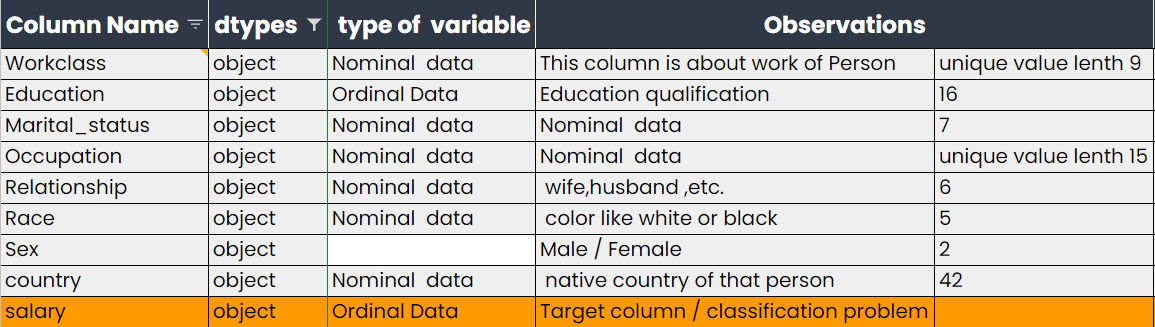

# occupation

In [136]:
print ('1)-->unique value lenth',len(list((categorical_columns['occupation'].unique()))))
print('-'*100)
print ('2)-->This is a list of unique names',categorical_columns['occupation'].unique())
print('-'*100)
print ("3)-->value_counts,",categorical_columns['occupation'].value_counts())

1)-->unique value lenth 15
----------------------------------------------------------------------------------------------------
2)-->This is a list of unique names ['Adm_clerical' 'Exec_managerial' 'Handlers_cleaners' 'Prof_specialty'
 'Other_service' 'Sales' 'Craft_repair' 'Transport_moving'
 'Farming_fishing' 'Machine_op_inspct' 'Tech_support' '?'
 'Protective_serv' 'Armed_Forces' 'Priv_house_serv']
----------------------------------------------------------------------------------------------------
3)-->value_counts, Prof_specialty       4140
Craft_repair         4099
Exec_managerial      4066
Adm_clerical         3770
Sales                3650
Other_service        3295
Machine_op_inspct    2002
?                    1843
Transport_moving     1597
Handlers_cleaners    1370
Farming_fishing       994
Tech_support          928
Protective_serv       649
Priv_house_serv       149
Armed_Forces            9
Name: occupation, dtype: int64


In [137]:
#Here private is the highest mode
categorical_columns['occupation']=categorical_columns['occupation'].replace(' ?','Others_occupation')

# workclass

In [138]:
print ('1)-->unique value lenth',len(list((categorical_columns['workclass'].unique()))))
print('-'*100)
print ('2)-->This is a list of unique names',categorical_columns['workclass'].unique())
print('-'*100)
print ("3)-->value_counts,",categorical_columns['workclass'].value_counts())

1)-->unique value lenth 9
----------------------------------------------------------------------------------------------------
2)-->This is a list of unique names ['State_gov' 'Self_emp_not_inc' 'Private' 'Federal_gov' 'Local_gov' '?'
 'Self_emp_inc' 'Without_pay' 'Never_worked']
----------------------------------------------------------------------------------------------------
3)-->value_counts, Private             22696
Self_emp_not_inc     2541
Local_gov            2093
?                    1836
State_gov            1298
Self_emp_inc         1116
Federal_gov           960
Without_pay            14
Never_worked            7
Name: workclass, dtype: int64


In [139]:
categorical_columns['workclass']=categorical_columns['workclass'].replace(' ?',' Private')

# education

In [140]:
print ('1)-->unique value lenth',len(list((categorical_columns['education'].unique()))))
print('-'*100)
print ('2)-->This is a list of unique names',categorical_columns['education'].unique())
print('-'*100)
print ("3)-->value_counts,",categorical_columns['education'].value_counts())

1)-->unique value lenth 16
----------------------------------------------------------------------------------------------------
2)-->This is a list of unique names ['Bachelors' 'HS_grad' '11th' 'Masters' '9th' 'Some_college' 'Assoc_acdm'
 'Assoc_voc' '7th_8th' 'Doctorate' 'Prof_school' '5th_6th' '10th'
 '1st_4th' 'Preschool' '12th']
----------------------------------------------------------------------------------------------------
3)-->value_counts, HS_grad         10501
Some_college     7291
Bachelors        5355
Masters          1723
Assoc_voc        1382
11th             1175
Assoc_acdm       1067
10th              933
7th_8th           646
Prof_school       576
9th               514
12th              433
Doctorate         413
5th_6th           333
1st_4th           168
Preschool          51
Name: education, dtype: int64


In [141]:
# Creating a bins for education column 

In [142]:
categorical_columns['education'].unique()

array(['Bachelors', 'HS_grad', '11th', 'Masters', '9th', 'Some_college',
       'Assoc_acdm', 'Assoc_voc', '7th_8th', 'Doctorate', 'Prof_school',
       '5th_6th', '10th', '1st_4th', 'Preschool', '12th'], dtype=object)

In [143]:
categorical_columns['education']=categorical_columns['education'].replace(['1st_4th','5th_6th','Prof_school','Preschool','7th_8th','9th','10th','11th','12th','HS_grad'],'school')
categorical_columns['education']=categorical_columns['education'].replace(['Assoc_acdm','Assoc_voc'],'Associate')
categorical_columns['education']=categorical_columns['education'].replace(['Some_college'],'College')

# marital-status

In [144]:
print ('1)-->unique value lenth',len(list((categorical_columns['marital_status'].unique()))))
print('-'*100)
print ('2)-->This is a list of unique names',categorical_columns['marital_status'].unique())
print('-'*100)
print ("3)-->value_counts,",categorical_columns['marital_status'].value_counts())

1)-->unique value lenth 7
----------------------------------------------------------------------------------------------------
2)-->This is a list of unique names ['Never_married' 'Married_civ_spouse' 'Divorced' 'Married_spouse_absent'
 'Separated' 'Married_AF_spouse' 'Widowed']
----------------------------------------------------------------------------------------------------
3)-->value_counts, Married_civ_spouse       14976
Never_married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married_spouse_absent      418
Married_AF_spouse           23
Name: marital_status, dtype: int64


# relationship

In [145]:
print ('1)-->unique value lenth',len(list((categorical_columns['relationship'].unique()))))
print('-'*100)
print ('2)-->This is a list of unique names',categorical_columns['relationship'].unique())
print('-'*100)
print ("3)-->value_counts,",categorical_columns['relationship'].value_counts())

1)-->unique value lenth 6
----------------------------------------------------------------------------------------------------
2)-->This is a list of unique names ['Not_in_family' 'Husband' 'Wife' 'Own_child' 'Unmarried' 'Other_relative']
----------------------------------------------------------------------------------------------------
3)-->value_counts, Husband           13193
Not_in_family      8305
Own_child          5068
Unmarried          3446
Wife               1568
Other_relative      981
Name: relationship, dtype: int64


### Workclass

In [146]:
print ('1)-->unique value lenth',len(list((categorical_columns['workclass'].unique()))))
print('-'*100)
print ('2)-->This is a list of unique names',categorical_columns['workclass'].unique())
print('-'*100)
print ("3)-->value_counts,",categorical_columns['workclass'].value_counts())

1)-->unique value lenth 9
----------------------------------------------------------------------------------------------------
2)-->This is a list of unique names ['State_gov' 'Self_emp_not_inc' 'Private' 'Federal_gov' 'Local_gov' '?'
 'Self_emp_inc' 'Without_pay' 'Never_worked']
----------------------------------------------------------------------------------------------------
3)-->value_counts, Private             22696
Self_emp_not_inc     2541
Local_gov            2093
?                    1836
State_gov            1298
Self_emp_inc         1116
Federal_gov           960
Without_pay            14
Never_worked            7
Name: workclass, dtype: int64


In [147]:
categorical_columns['workclass']=categorical_columns['workclass'].replace('?','Private')

In [148]:
df5=categorical_columns['workclass']
b= []
for i in  df5:
    b.append('_'.join(i.split('-')).strip())
    

categorical_columns['workclass']=b

# race

In [149]:
print ('1)-->unique value lenth',len(list((categorical_columns['race'].unique()))))
print('-'*100)
print ('2)-->This is a list of unique names',categorical_columns['race'].unique())
print('-'*100)
print ("3)-->value_counts,",categorical_columns['race'].value_counts())

1)-->unique value lenth 5
----------------------------------------------------------------------------------------------------
2)-->This is a list of unique names ['White' 'Black' 'Asian_Pac_Islander' 'Amer_Indian_Eskimo' 'Other']
----------------------------------------------------------------------------------------------------
3)-->value_counts, White                 27816
Black                  3124
Asian_Pac_Islander     1039
Amer_Indian_Eskimo      311
Other                   271
Name: race, dtype: int64


# sex

In [150]:
print ('1)-->unique value lenth',len(list((categorical_columns['sex'].unique()))))
print('-'*100)
print ('2)-->This is a list of unique names',categorical_columns['sex'].unique())
print('-'*100)
print ("3)-->value_counts,",categorical_columns['sex'].value_counts())

1)-->unique value lenth 2
----------------------------------------------------------------------------------------------------
2)-->This is a list of unique names ['Male' 'Female']
----------------------------------------------------------------------------------------------------
3)-->value_counts, Male      21790
Female    10771
Name: sex, dtype: int64


# country

In [151]:
print ('1)-->unique value lenth',len(list((categorical_columns['country'].unique()))))
print('-'*100)
print ('2)-->This is a list of unique names',categorical_columns['country'].unique())
print('-'*100)
print ("3)-->value_counts,",categorical_columns['country'].value_counts())

1)-->unique value lenth 42
----------------------------------------------------------------------------------------------------
2)-->This is a list of unique names ['United_States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto_Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican_Republic' 'El_Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying_US(Guam_USVI_etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand_Netherlands']
----------------------------------------------------------------------------------------------------
3)-->value_counts, United_States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto_Rico                    

In [152]:
categorical_columns['country']=categorical_columns['country'].replace('?','Others_country')
categorical_columns['country']=categorical_columns['country'].replace('Outlying_US(Guam_USVI_etc)','Outlying_US_Guam_USVI_etc')
categorical_columns['country']=categorical_columns['country'].replace('Trinadad&Tobago','Trinadad_Tobago')

In [153]:
categorical_columns

,workclass,education,marital_status,occupation,relationship,race,sex,country,salary
0,State_gov,Bachelors,Never_married,Adm_clerical,Not_in_family,White,Male,United_States,0
1,Self_emp_not_inc,Bachelors,Married_civ_spouse,Exec_managerial,Husband,White,Male,United_States,0
2,Private,school,Divorced,Handlers_cleaners,Not_in_family,White,Male,United_States,0
3,Private,school,Married_civ_spouse,Handlers_cleaners,Husband,Black,Male,United_States,0
4,Private,Bachelors,Married_civ_spouse,Prof_specialty,Wife,Black,Female,Cuba,0
...,...,...,...,...,...,...,...,...,...
32556,Private,Associate,Married_civ_spouse,Tech_support,Wife,White,Female,United_States,0
32557,Private,school,Married_civ_spouse,Machine_op_inspct,Husband,White,Male,United_States,1
32558,Private,school,Widowed,Adm_clerical,Unmarried,White,Female,United_States,0
32559,Private,school,Never_married,Adm_clerical,Own_child,White,Male,United_States,0


### Occupation

In [154]:
print ('1)-->unique value lenth',len(list((categorical_columns['occupation'].unique()))))
print('-'*100)
print ('2)-->This is a list of unique names',categorical_columns['occupation'].unique())
print('-'*100)
print ("3)-->value_counts,",categorical_columns['occupation'].value_counts())

1)-->unique value lenth 15
----------------------------------------------------------------------------------------------------
2)-->This is a list of unique names ['Adm_clerical' 'Exec_managerial' 'Handlers_cleaners' 'Prof_specialty'
 'Other_service' 'Sales' 'Craft_repair' 'Transport_moving'
 'Farming_fishing' 'Machine_op_inspct' 'Tech_support' '?'
 'Protective_serv' 'Armed_Forces' 'Priv_house_serv']
----------------------------------------------------------------------------------------------------
3)-->value_counts, Prof_specialty       4140
Craft_repair         4099
Exec_managerial      4066
Adm_clerical         3770
Sales                3650
Other_service        3295
Machine_op_inspct    2002
?                    1843
Transport_moving     1597
Handlers_cleaners    1370
Farming_fishing       994
Tech_support          928
Protective_serv       649
Priv_house_serv       149
Armed_Forces            9
Name: occupation, dtype: int64


In [155]:
categorical_columns['occupation']=categorical_columns['occupation'].replace('?','Others_occupation')

In [156]:
print(categorical_columns["race"].unique())
print(categorical_columns["sex"].unique())
print(categorical_columns["country"].unique())
print(categorical_columns["relationship"].unique())
print(categorical_columns["occupation"].unique())
print(categorical_columns["marital_status"].unique())
print(categorical_columns["education"].unique())
print(categorical_columns["workclass"].unique())

['White' 'Black' 'Asian_Pac_Islander' 'Amer_Indian_Eskimo' 'Other']
['Male' 'Female']
['United_States' 'Cuba' 'Jamaica' 'India' 'Others_country' 'Mexico'
 'South' 'Puerto_Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican_Republic' 'El_Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying_US_Guam_USVI_etc' 'Scotland' 'Trinadad_Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand_Netherlands']
['Not_in_family' 'Husband' 'Wife' 'Own_child' 'Unmarried' 'Other_relative']
['Adm_clerical' 'Exec_managerial' 'Handlers_cleaners' 'Prof_specialty'
 'Other_service' 'Sales' 'Craft_repair' 'Transport_moving'
 'Farming_fishing' 'Machine_op_inspct' 'Tech_support' 'Others_occupation'
 'Protective_serv' 'Armed_Forces' 'Priv_house_serv']
['Never_married' 'Married_civ_spouse' 'Divorced' 'Married_spouse_absent'
 'Separated' 'Married_AF_sp

## Checking the relation with target variable

# It is time to convert categorical_columns into  numrical value  using get_dummies encoding technique

In [157]:

df_dummies = pd.get_dummies(categorical_columns[['workclass', 'education', 'marital_status',
                                                'occupation', 'relationship', 'race','sex' , 'country',
                                                 ] ], drop_first=True)

In [158]:
df_dummies

,workclass_Local_gov,workclass_Never_worked,workclass_Private,workclass_Self_emp_inc,workclass_Self_emp_not_inc,workclass_State_gov,workclass_Without_pay,education_Bachelors,education_College,education_Doctorate,...,country_Portugal,country_Puerto_Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad_Tobago,country_United_States,country_Vietnam,country_Yugoslavia
0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [159]:
### 2ND FEATURE SELECTION TECHNIQUE (SELECT PERCENTILE FEATURE , CHI2)
from sklearn.feature_selection import SelectPercentile , chi2

In [160]:
# instantiate selectpercentile an fit (feature and label)
Spercentile = SelectPercentile(score_func = chi2 , percentile = 80)
sp = Spercentile.fit(df_dummies,categorical_columns['salary']) 

In [161]:
# seperate the feature to check the p value
cols = Spercentile.get_support(indices = True)  # this will give you index of 80% feature
print ('feature index'  , cols)

feature = df_dummies.columns[cols]              # this will give you name of that 80% feature
print('feature' , list(feature))

feature index [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 46 48 49 50 51
 53 54 56 59 60 62 63 64 66 67 69 70 71 73 74 77 80 81]
feature ['workclass_Local_gov', 'workclass_Never_worked', 'workclass_Private', 'workclass_Self_emp_inc', 'workclass_Self_emp_not_inc', 'workclass_State_gov', 'workclass_Without_pay', 'education_Bachelors', 'education_College', 'education_Doctorate', 'education_Masters', 'education_school', 'marital_status_Married_AF_spouse', 'marital_status_Married_civ_spouse', 'marital_status_Married_spouse_absent', 'marital_status_Never_married', 'marital_status_Separated', 'marital_status_Widowed', 'occupation_Craft_repair', 'occupation_Exec_managerial', 'occupation_Farming_fishing', 'occupation_Handlers_cleaners', 'occupation_Machine_op_inspct', 'occupation_Other_service', 'occupation_Others_occupation', 'occupation_Priv_house_serv', 'occupation_Prof_specialty', 'occupation_Protective_s

In [162]:
# lets se all the feature vs chi2 score vs pvalue
df_score = pd.DataFrame ({'feature':df_dummies.columns , 'chi2_score': Spercentile.scores_ , 'p_value': Spercentile.pvalues_})
# this will give all 100% but we have to select 80%
df_score.sort_values (by = 'chi2_score' , ascending = False)   

,feature,chi2_score,p_value
13,marital_status_Married_civ_spouse,3477.515877,0.000000e+00
15,marital_status_Never_married,2218.521977,0.000000e+00
34,relationship_Own_child,1435.873016,0.000000e+00
20,occupation_Exec_managerial,1315.482632,4.882518e-288
27,occupation_Prof_specialty,981.835068,1.594790e-215
...,...,...,...
45,country_Cuba,0.259531,6.104424e-01
52,country_Greece,0.194900,6.588693e-01
61,country_Ireland,0.138458,7.098189e-01
58,country_Hungary,0.007168,9.325272e-01


In [163]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Finding variance inflation factor in each scaled column i.e X_scaled.shape [1] (1/(1-R2))
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (df_dummies, i) for i in range (df_dummies.shape[1])]
vif["Features"] = df_dummies. columns
#Let's check the values

In [164]:
vif

,vif,Features
0,0.070891,workclass_Local_gov
1,1.012446,workclass_Never_worked
2,0.238010,workclass_Private
3,0.185553,workclass_Self_emp_inc
4,0.360520,workclass_Self_emp_not_inc
...,...,...
78,1.171524,country_Thailand
79,1.162200,country_Trinadad_Tobago
80,2.009274,country_United_States
81,1.658682,country_Vietnam


# Moving Towards continuous_columns_

In [165]:
df2 = pd.read_csv("adult.csv") #reading the file

In [166]:
df2['salary']=df2['salary'].replace(' <=50K', 0)
df2['salary']=df2['salary'].replace(' >50K', 1)

In [167]:
# get all the continuous columns name
num_cols = list(df2.select_dtypes(exclude='object').columns)
print(f'continuous_columns_: {num_cols}')

continuous_columns_: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'salary']


In [168]:
continuous_columns_=['age','fnlwgt','capital-gain','capital-loss','hours-per-week','salary']

In [169]:
continuous_columns=df2[continuous_columns_].copy()

In [170]:
continuous_columns.rename(columns={"capital-gain": "capital_gain", "capital-loss": "capital_loss", "hours-per-week": "hours_per_week"}, inplace=True)

In [171]:
continuous_columns

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,salary
0,39,77516,2174,0,40,0
1,50,83311,0,0,13,0
2,38,215646,0,0,40,0
3,53,234721,0,0,40,0
4,28,338409,0,0,40,0
...,...,...,...,...,...,...
32556,27,257302,0,0,38,0
32557,40,154374,0,0,40,1
32558,58,151910,0,0,40,0
32559,22,201490,0,0,20,0


In [172]:
print('null value____>',continuous_columns['hours_per_week'].isnull().sum())
print('uniqu value____>',continuous_columns['hours_per_week'].unique())
print('skewness____>',continuous_columns['hours_per_week'].skew())

null value____> 0
uniqu value____> [40 13 16 45 50 80 30 35 60 20 52 44 15 25 38 43 55 48 58 32 70  2 22 56
 41 28 36 24 46 42 12 65  1 10 34 75 98 33 54  8  6 64 19 18 72  5  9 47
 37 21 26 14  4 59  7 99 53 39 62 57 78 90 66 11 49 84  3 17 68 27 85 31
 51 77 63 23 87 88 73 89 97 94 29 96 67 82 86 91 81 76 92 61 74 95]
skewness____> 0.22764253680450092


In [173]:
print('null value____>',continuous_columns['capital_loss'].isnull().sum())
print('uniqu value____>',continuous_columns['capital_loss'].unique())
print('skewness____>',continuous_columns['capital_loss'].skew())

null value____> 0
uniqu value____> [   0 2042 1408 1902 1573 1887 1719 1762 1564 2179 1816 1980 1977 1876
 1340 2206 1741 1485 2339 2415 1380 1721 2051 2377 1669 2352 1672  653
 2392 1504 2001 1590 1651 1628 1848 1740 2002 1579 2258 1602  419 2547
 2174 2205 1726 2444 1138 2238  625  213 1539  880 1668 1092 1594 3004
 2231 1844  810 2824 2559 2057 1974  974 2149 1825 1735 1258 2129 2603
 2282  323 4356 2246 1617 1648 2489 3770 1755 3683 2267 2080 2457  155
 3900 2201 1944 2467 2163 2754 2472 1411]
skewness____> 4.594629121679692


In [174]:
print('null value____>',continuous_columns['capital_gain'].isnull().sum())
print('uniqu value____>',continuous_columns['capital_gain'].unique())
print('skewness____>',continuous_columns['capital_gain'].skew())

null value____> 0
uniqu value____> [ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2062  2354  5455 15020  1424  3273 22040
  4416  3908 10566   991  4931  1086  7430  6497   114  7896  2346  3418
  3432  2907  1151  2414  2290 15831 41310  4508  2538  3456  6418  1848
  3887  5721  9562  1455  2036  1831 11678  2936  2993  7443  6360  1797
  1173  4687  6723  2009  6097  2653  1639 18481  7978  2387  5060]
skewness____> 11.953847687699799


In [175]:
print('null value---->',continuous_columns['fnlwgt'].isnull().sum())
print('uniqu value---->',continuous_columns['fnlwgt'].unique())
print('skewness---->',continuous_columns['fnlwgt'].skew())

null value----> 0
uniqu value----> [ 77516  83311 215646 ...  34066  84661 257302]
skewness----> 1.4469800945789826


In [176]:
print('null value---->',continuous_columns['age'].isnull().sum())
print('uniqu value---->',continuous_columns['age'].unique())
print('skewness---->',continuous_columns['age'].skew())

null value----> 0
uniqu value----> [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
skewness----> 0.5587433694130484


# correlation with target
- Corr with target 
- heatmap
- ANOVA test

In [177]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Finding variance inflation factor in each scaled column i.e X_scaled.shape [1] (1/(1-R2))
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (continuous_columns, i) for i in range (continuous_columns.shape[1])]
vif["Features"] = continuous_columns. columns
#vif must be done after scaling the data 
#Let's check the values

In [178]:
vif

,vif,Features
0,6.218057,age
1,3.480254,fnlwgt
2,1.080619,capital_gain
3,1.077404,capital_loss
4,6.918160,hours_per_week
5,1.519501,salary


In [179]:
continuous_columns.corrwith(categorical_columns['salary'])

age               0.234037
fnlwgt           -0.009463
capital_gain      0.223329
capital_loss      0.150526
hours_per_week    0.229689
salary            1.000000
dtype: float64

<AxesSubplot: >

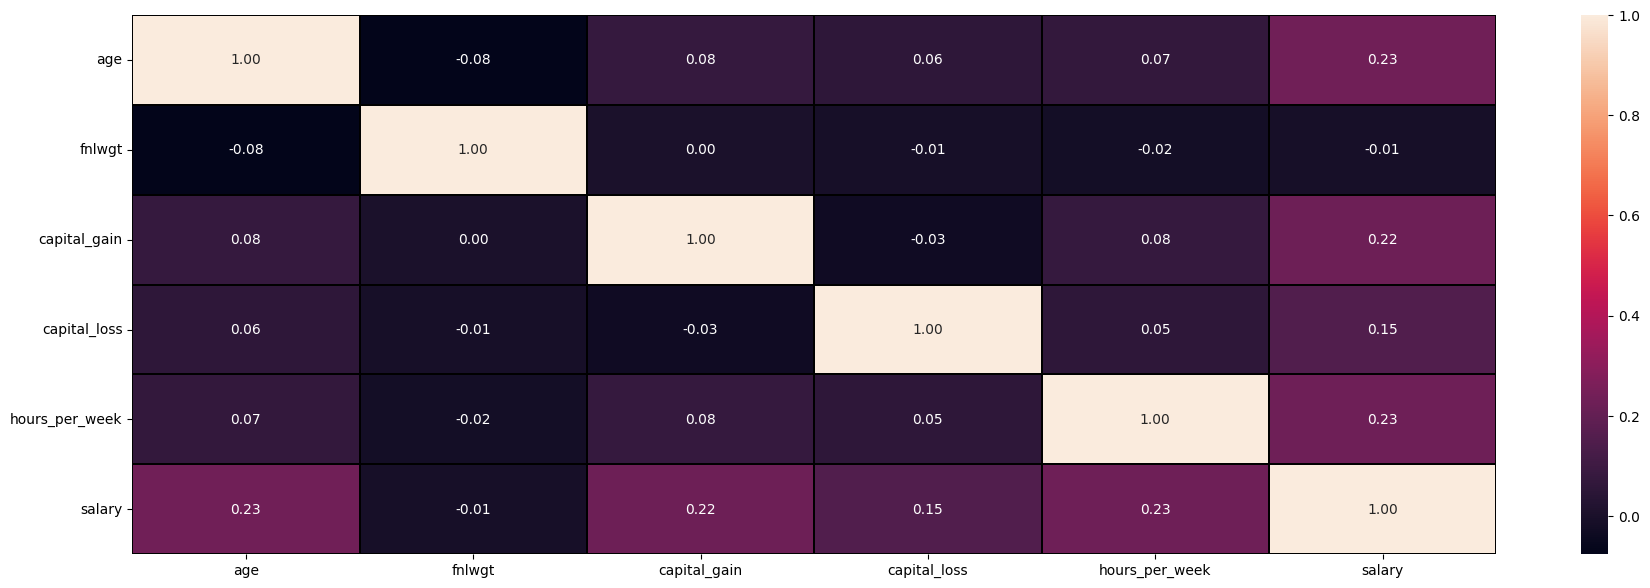

In [180]:
plt.figure(figsize=(22,7)) # ploting the heat map
sns.heatmap(continuous_columns.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [181]:
from sklearn. feature_selection import SelectKBest, f_classif

In [182]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, categorical_col):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in categorical_col:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [183]:
FunctionAnova(inpData=continuous_columns, 
              TargetVariable='salary', 
              categorical_col=continuous_columns)

##### ANOVA Results ##### 

age is correlated with salary | P-Value: 0.0
fnlwgt is correlated with salary | P-Value: 1.5629979058448005e-18
capital_gain is correlated with salary | P-Value: 0.0
capital_loss is correlated with salary | P-Value: 0.0
hours_per_week is correlated with salary | P-Value: 0.0
salary is correlated with salary | P-Value: 0.0


['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week', 'salary']

# Visual Distribution for continuous predictors
- displot --> skewness
- box plot --> outlires 

# 1 age

<AxesSubplot: xlabel='age', ylabel='Density'>

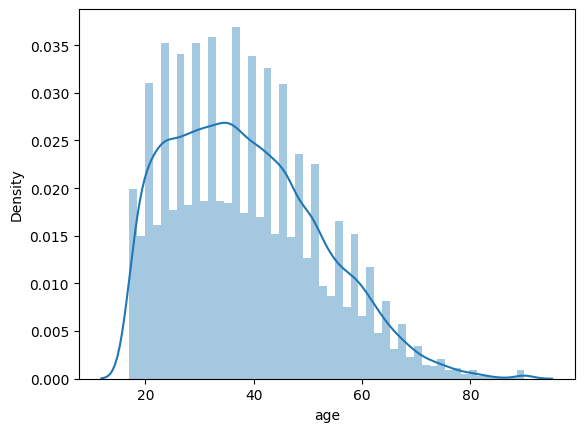

In [184]:

sns.distplot(continuous_columns['age'])

<AxesSubplot: >

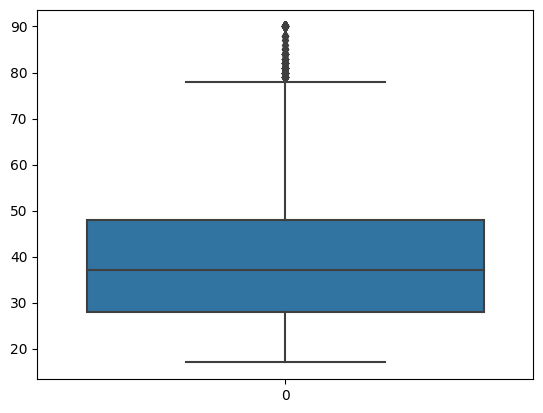

In [185]:
sns.boxplot(continuous_columns['age'])

# 2 fnlwgt 

<AxesSubplot: xlabel='fnlwgt', ylabel='Density'>

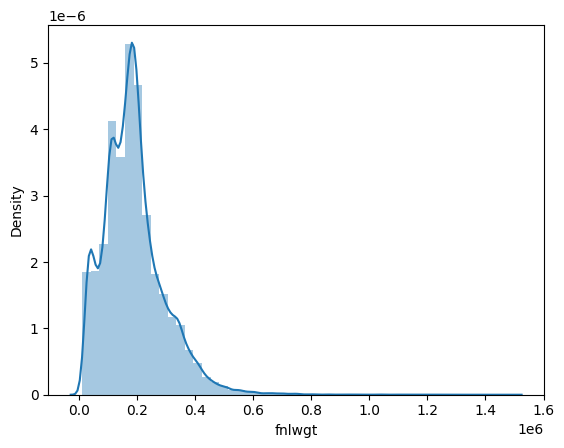

In [186]:
sns.distplot(continuous_columns['fnlwgt'])

<AxesSubplot: >

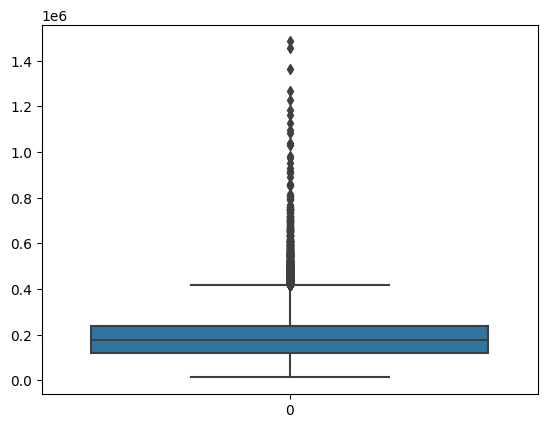

In [187]:
sns.boxplot(continuous_columns['fnlwgt'])

# 3  capital-gain

<AxesSubplot: xlabel='capital_gain', ylabel='Density'>

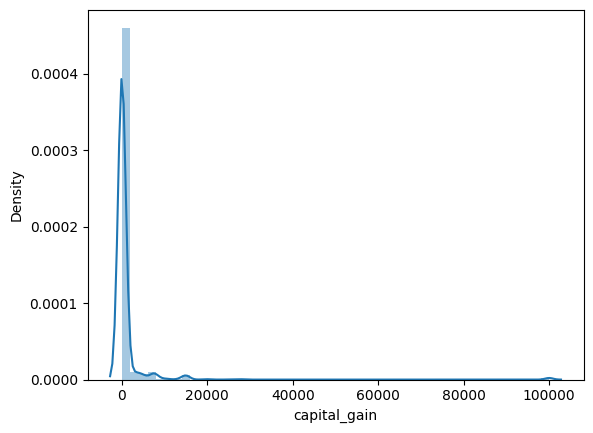

In [188]:
sns.distplot(continuous_columns['capital_gain'])

<AxesSubplot: >

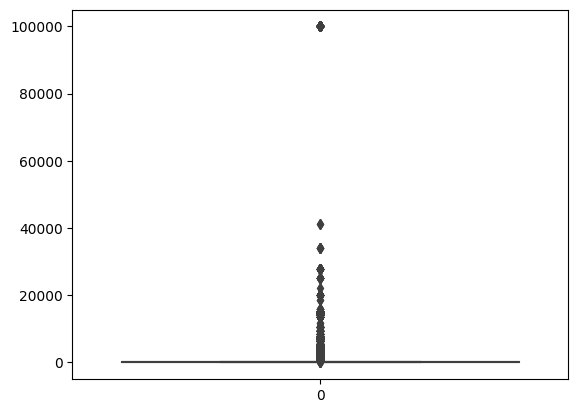

In [189]:
sns.boxplot(continuous_columns['capital_gain'])

# 4 capital-loss

<AxesSubplot: xlabel='capital_loss', ylabel='Density'>

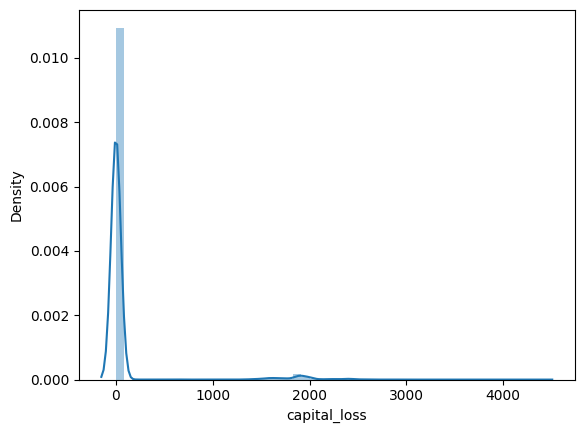

In [190]:
sns.distplot(continuous_columns['capital_loss'])

<AxesSubplot: >

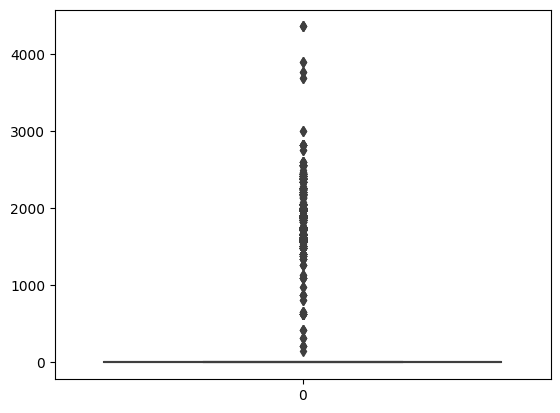

In [191]:
sns.boxplot(continuous_columns['capital_loss'])

# 5 hours-per-week

<AxesSubplot: xlabel='hours_per_week', ylabel='Density'>

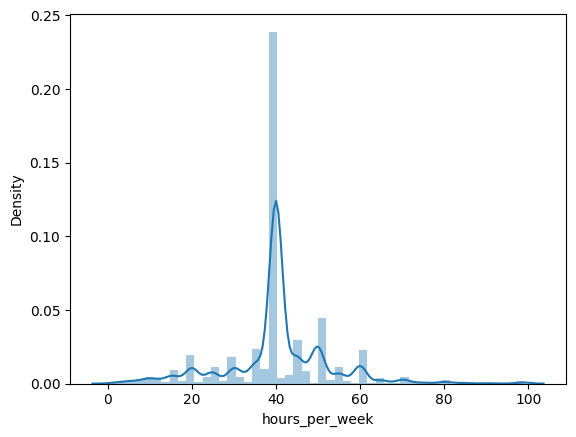

In [192]:
sns.distplot(continuous_columns['hours_per_week'])

<AxesSubplot: >

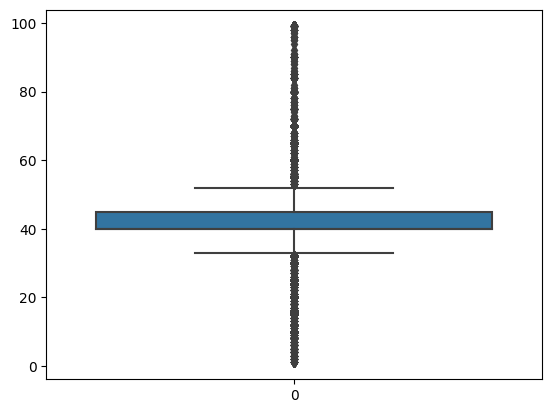

In [193]:
sns.boxplot(continuous_columns['hours_per_week'])

# skewness treatment 
### for the below columns 
1) age  ---> PowerTransformer--> box-cox <br>

2) capital-gain ---> PowerTransformer-->yeo-johnson <br>   
3) capital-loss---> PowerTransformer-->  yeo-johnson<br>

# 1

In [194]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='box-cox')
continuous_columns['age'] = scaler.fit_transform(continuous_columns[['age']].values)

In [195]:
continuous_columns[ 'age'].skew()

-0.016122155859744178

<AxesSubplot: >

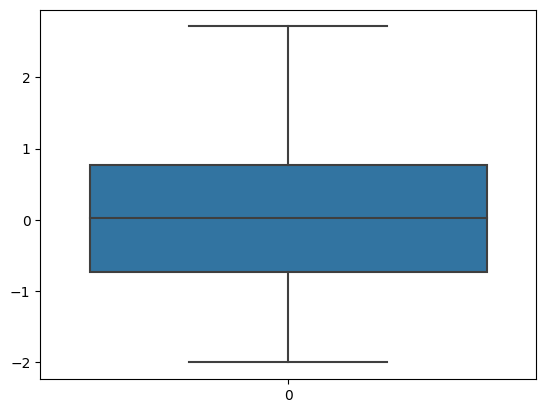

In [196]:
sns.boxplot(continuous_columns['age']) # Final

# 2

In [197]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='yeo-johnson')
continuous_columns['capital_gain'] = scaler.fit_transform(continuous_columns[['capital_gain']].values)

In [198]:
continuous_columns['capital_gain'].skew()

3.0162831749223002

# 3

In [199]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='yeo-johnson')
continuous_columns['capital_loss'] = scaler.fit_transform(continuous_columns[['capital_loss']].values)

In [200]:
continuous_columns['capital_loss'].skew()

4.299587185399981

In [201]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='yeo-johnson')
continuous_columns['fnlwgt'] = scaler.fit_transform(continuous_columns[['fnlwgt']].values)

In [202]:
continuous_columns['fnlwgt'].skew()

0.016901991421126465

In [203]:
X = continuous_columns.drop('salary', axis=1)
y = continuous_columns.salary

In [204]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Finding variance inflation factor in each scaled column i.e X_scaled.shape [1] (1/(1-R2))
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (continuous_columns, i) for i in range (continuous_columns.shape[1])]
vif["Features"] = continuous_columns. columns
#vif must be done after scaling the data 
#Let's check the values

In [205]:
vif

,vif,Features
0,1.077386,age
1,1.005005,fnlwgt
2,1.089613,capital_gain
3,1.030840,capital_loss
4,1.426078,hours_per_week
5,1.599966,salary


# Select the best predictors  Using SelectKBest technique

In [206]:
best_features = SelectKBest(score_func=f_classif, k=4) # k means how many feature we want to select from  out off
fit= best_features.fit (X,y)

df_scores = pd.DataFrame (fit.scores_)
df_columns= pd.DataFrame (X.columns)
#concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature_Name', 'Score'] # name output columns

print (feature_scores.nlargest (4, 'Score')) # print 17 best features

     Feature_Name        Score
2    capital_gain  2482.512830
0             age  2441.170993
4  hours_per_week  1813.386282
3    capital_loss   638.575003


In [207]:
continuous_columns.drop(columns=['fnlwgt'],axis=1,inplace=True)

# Selecting final predictors for Machine Learning model

In [208]:
SelectedColumns=[df_dummies.columns,continuous_columns.columns]

In [209]:
SelectedColumns

[Index(['workclass_Local_gov', 'workclass_Never_worked', 'workclass_Private',
        'workclass_Self_emp_inc', 'workclass_Self_emp_not_inc',
        'workclass_State_gov', 'workclass_Without_pay', 'education_Bachelors',
        'education_College', 'education_Doctorate', 'education_Masters',
        'education_school', 'marital_status_Married_AF_spouse',
        'marital_status_Married_civ_spouse',
        'marital_status_Married_spouse_absent', 'marital_status_Never_married',
        'marital_status_Separated', 'marital_status_Widowed',
        'occupation_Armed_Forces', 'occupation_Craft_repair',
        'occupation_Exec_managerial', 'occupation_Farming_fishing',
        'occupation_Handlers_cleaners', 'occupation_Machine_op_inspct',
        'occupation_Other_service', 'occupation_Others_occupation',
        'occupation_Priv_house_serv', 'occupation_Prof_specialty',
        'occupation_Protective_serv', 'occupation_Sales',
        'occupation_Tech_support', 'occupation_Transport_mov

In [210]:
# Concatenation
features_for_ml= dfcat2 = pd.concat([continuous_columns,df_dummies],axis=1)

In [211]:
x = features_for_ml.drop (columns = ['salary'])
y = features_for_ml[ 'salary']

In [212]:
x

,age,capital_gain,capital_loss,hours_per_week,workclass_Local_gov,workclass_Never_worked,workclass_Private,workclass_Self_emp_inc,workclass_Self_emp_not_inc,workclass_State_gov,...,country_Portugal,country_Puerto_Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad_Tobago,country_United_States,country_Vietnam,country_Yugoslavia
0,0.176213,3.317526,-0.22121,40,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.891511,-0.301425,-0.22121,13,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.103207,-0.301425,-0.22121,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.063801,-0.301425,-0.22121,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.730707,-0.301425,-0.22121,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.827087,-0.301425,-0.22121,38,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,0.247689,-0.301425,-0.22121,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,1.333839,-0.301425,-0.22121,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,-1.358545,-0.301425,-0.22121,20,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [213]:
for i in features_for_ml:
    print(i)


age
capital_gain
capital_loss
hours_per_week
salary
workclass_Local_gov
workclass_Never_worked
workclass_Private
workclass_Self_emp_inc
workclass_Self_emp_not_inc
workclass_State_gov
workclass_Without_pay
education_Bachelors
education_College
education_Doctorate
education_Masters
education_school
marital_status_Married_AF_spouse
marital_status_Married_civ_spouse
marital_status_Married_spouse_absent
marital_status_Never_married
marital_status_Separated
marital_status_Widowed
occupation_Armed_Forces
occupation_Craft_repair
occupation_Exec_managerial
occupation_Farming_fishing
occupation_Handlers_cleaners
occupation_Machine_op_inspct
occupation_Other_service
occupation_Others_occupation
occupation_Priv_house_serv
occupation_Prof_specialty
occupation_Protective_serv
occupation_Sales
occupation_Tech_support
occupation_Transport_moving
relationship_Not_in_family
relationship_Other_relative
relationship_Own_child
relationship_Unmarried
relationship_Wife
race_Asian_Pac_Islander
race_Black
race

# Using SMOTE to balance the data set 

In [214]:
# pip install imblearn

In [215]:
from imblearn.over_sampling import SMOTE


print(x.shape,y.shape)
oversample = SMOTE()
f, l = oversample.fit_resample(x, y)
print(f.shape,l.shape)

(32561, 87) (32561,)
(49440, 87) (49440,)


<AxesSubplot: xlabel='salary', ylabel='count'>

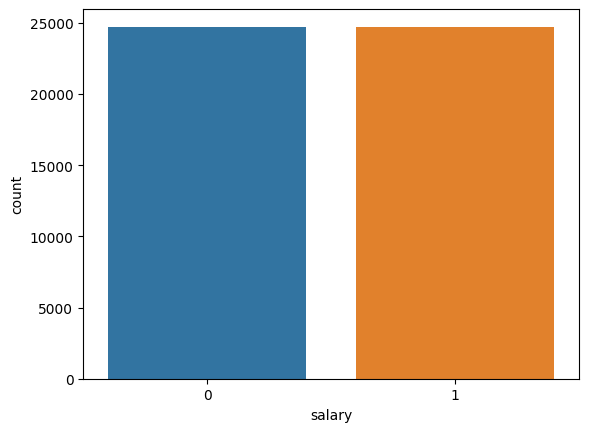

In [216]:
sns.countplot(x=l)

In [217]:
log_reg = LogisticRegression ()

In [218]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(f,l,test_size=.30,random_state=i)
    log_reg.fit(x_train,y_train)
    pred=log_reg.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8443905070118662 Random state:- 46


In [219]:
x_train,x_test,y_train,y_test= train_test_split(f , l, test_size= 0.30, random_state = 70)

In [220]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [221]:
from sklearn.metrics import classification_report

In [222]:
y_pred = log_reg.predict(x_test)
y_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [223]:
#Model Accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8357605177993528

In [224]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[6114, 1356],
       [1080, 6282]], dtype=int64)

In [225]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      7470
           1       0.82      0.85      0.84      7362

    accuracy                           0.84     14832
   macro avg       0.84      0.84      0.84     14832
weighted avg       0.84      0.84      0.84     14832



In [226]:
# ROC Curve
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve (y_test, y_pred)

In [227]:
# thresholds [0] means no instances predicted (It should be read from 0-max)
print ('Threshold =', thresholds)
print ('True Positive rate = ',tpr)
print ('False Positive rate = ',fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.85330073 1.        ]
False Positive rate =  [0.        0.1815261 1.       ]


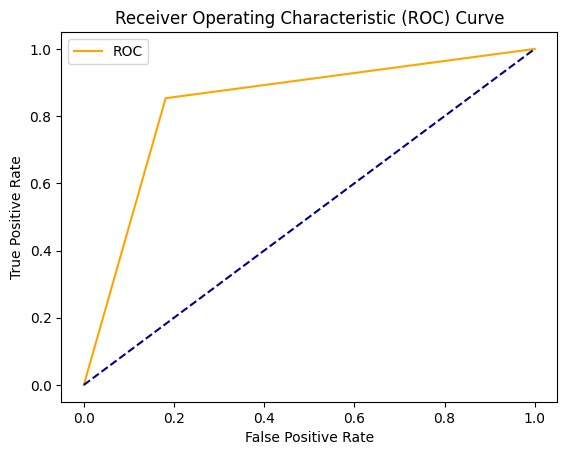

In [228]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [229]:
# How much area it is covering (AUC)

auc_score = roc_auc_score (y_test,y_pred)
print (auc_score)

0.8358873145393309


In [230]:
knn=KNeighborsClassifier()
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(f,l,test_size=.30,random_state=i)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8425701186623517 Random state:- 58


In [231]:
x_train,x_test,y_train,y_test=train_test_split(f,l,test_size=0.3,random_state=46)

In [232]:
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.837
classification report is
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      7392
           1       0.79      0.92      0.85      7440

    accuracy                           0.84     14832
   macro avg       0.85      0.84      0.84     14832
weighted avg       0.85      0.84      0.84     14832

confusion matrix is
[[5603 1789]
 [ 622 6818]]




In [233]:
cross_val_score (knn, f, l, cv=5)

array([0.8180623 , 0.83252427, 0.85032362, 0.84819984, 0.84546926])

In [234]:
cross_val_score (knn, f, l, cv=5).mean()

0.8389158576051781

# Lets use Ensemble approch
####  Bagging and boosting

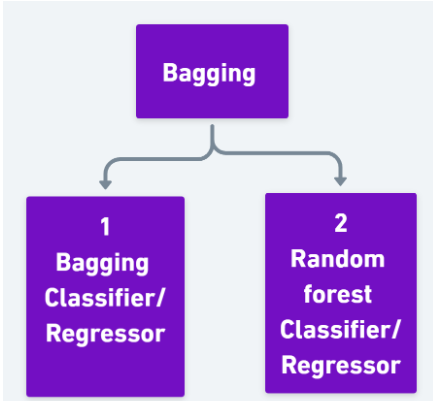

In [235]:
from sklearn.ensemble import BaggingClassifier

In [236]:
bag_knn = BaggingClassifier(
                             KNeighborsClassifier (n_neighbors=5), # value of k = 5 
                             n_estimators=9, max_samples=0.7, # n_estimators means 9 model you have build 
                             bootstrap=True, random_state=3, oob_score=True
                            )

In [237]:
bag_knn.fit (x_train, y_train)
bag_knn.score (x_test, y_test)

0.8355582524271845

In [238]:
from sklearn.ensemble import RandomForestClassifier

In [239]:
# Write one function and call as many as times to check accuracy_score of different models
def metric_score (clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict (x_train)
        print("\n================Train Result=====")
        print (f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
    elif train==False:
        pred = clf.predict(x_test)
        print("\n=================Test Result================")
        print (f"Accuracy Score: {accuracy_score(y_test, pred)* 100:.2f}%")
        print ('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2)) ## Model confidence/accuracy

In [240]:
# Initiate Decision Tree Classifier with new parameters and train
random_clf = RandomForestClassifier()
# Train the model
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [241]:
# Call the function and pass dataset to check train and test score
metric_score (random_clf,x_train, x_test, y_train,y_test, train=True) # This is for training socre
 # This is for testing score
metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=====
Accuracy Score: 98.15%

=================Test Result================
Accuracy Score: 87.30%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      7392
           1       0.87      0.88      0.87      7440

    accuracy                           0.87     14832
   macro avg       0.87      0.87      0.87     14832
weighted avg       0.87      0.87      0.87     14832



 <font face = "Verdana" size = "3">
<b>Within the boosting we have few algorithms we are going to work on that</b><br>
           <font face = "Verdana" size = "3"><mark>1) Adaptive boosting 2) Gradient boosting3)XGB

In [242]:
from sklearn.ensemble import AdaBoostClassifier

In [243]:
ada=AdaBoostClassifier()

In [244]:
x_train,x_test,y_train,y_test= train_test_split(f , l, test_size= 0.25, random_state = 51)

In [245]:
ada. fit (x_train,y_train)

AdaBoostClassifier()

In [246]:
ada.fit (x_train, y_train)
ada.score (x_test, y_test)

0.8424757281553398

In [247]:
#graident boosting classifier
from sklearn.ensemble import GradientBoostingClassifier # GradientBoostingRegressor If we have regression problem 
from sklearn.metrics import classification_report , accuracy_score

In [248]:
XX_train,XX_test,y_train,y_test=train_test_split(f , l, test_size= 0.25, random_state = 51)

In [249]:
def mertric_Score (clf,XX_train,XX_test,y_train,y_test,train= True):
    if train:
        y_pred=clf.predict(XX_train)
        print('=== Training Score ===')
        print(f"Accuracy score : {accuracy_score(y_train,y_pred)*100 : 2f} %")
        
    elif train==False:
        pred = clf.predict(XX_test)
        print('=== Testing Score ===')
        print(f"Accuracy Score : {accuracy_score(y_test,pred)*100 : 2f}%")
        
        print ('\n \n Classification Report \n' , classification_report(y_test,pred,digits=2))

In [250]:
XX_train,XX_test,y_train,y_test=train_test_split(f , l, test_size= 0.30, random_state = 46)

In [251]:
# initiate GradientBoostingClassifier
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(XX_train , y_train)

GradientBoostingClassifier()

In [252]:
# maxacc=0
# maxrn=0

# for i in range(1,100):
#     XX_train,XX_test,y_train,y_test=train_test_split(f , l, test_size= 0.30, random_state = i)
#     gbdt_clf.fit(XX_train , y_train)
#     pred=gbdt_clf.predict(XX_test)
#     score=accuracy_score(pred,y_test)
#     if score>maxacc:
#         maxacc=score
#         maxrn=i
# print('accuracy_score:-',maxacc,'Random state:-',maxrn)

In [253]:
# call the function
mertric_Score(gbdt_clf,XX_train,XX_test,y_train,y_test,train=True)
mertric_Score(gbdt_clf,XX_train,XX_test,y_train,y_test,train=False)

=== Training Score ===
Accuracy score :  84.835876 %
=== Testing Score ===
Accuracy Score :  85.052589%

 
 Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      7392
           1       0.84      0.87      0.85      7440

    accuracy                           0.85     14832
   macro avg       0.85      0.85      0.85     14832
weighted avg       0.85      0.85      0.85     14832



In [254]:
cross_val_score (gbdt_clf, f, l, cv=5)

array([0.8183657 , 0.83302994, 0.85679612, 0.85436893, 0.85689725])

In [255]:
cross_val_score (gbdt_clf, f, l, cv=5).mean()

0.8438915857605178

# You can save the model and later you can use it for prediction

In [256]:
import pickle

In [257]:
# saving the model to the local file system
pickle.dump (gbdt_clf, open('gbdtrevise2', 'wb'))

In [258]:
a=x_train.iloc[0]

In [259]:
ab=pd.DataFrame(a)

In [260]:
ab

,40018
age,0.541976
capital_gain,-0.301425
capital_loss,-0.221210
hours_per_week,40.000000
workclass_Local_gov,0.000000
...,...
country_Thailand,0.000000
country_Trinadad_Tobago,0.000000
country_United_States,1.000000
country_Vietnam,0.000000


In [261]:

for i in ab[40018]:
    print(i)

0.5419758143836417
-0.30142547100632877
-0.22120963524525747
40.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
